### Latar Belakang

DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitior. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Setelah kemarin kita mempersiapkan data sekaligus melakukan Cleansing, maka sekarang saatnya kita untuk membuat model yang tepat untuk memprediksi churn pelanggan.


### Tugas dan Langkah

Pada project part 1 kemarin kita telah melakukan Cleansing Data. Sekarang, sebagai data scientist kamu diminta untuk membuat model yang tepat.

Pada tugas kali ini, kamu akan melakukan Pemodelan Machine Learning dengan menggunakan data bulan lalu, yakni Juni 2020.

Langkah yang akan dilakukan adalah,

    Melakukan Exploratory Data Analysis
    Melakukan Data Pre-Processing
    Melakukan Pemodelan Machine Learning
    Menentukan Model Terbaik


### Library yang Digunakan

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,

    Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.
        read_csv() digunakan untuk membaca file csv
        replace() digunakan untuk mengganti nilai
        value_counts() digunakan untuk mengitung unik dari kolom
        drop() digunakan untuk menghapus
        describe() digunakan untuk melihat deskripsi datanya
        value_counts() digunakan untuk mengitung unik dari kolom
    Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.
        figure() digunakan untuk membuat figure gambar baru
        subplots()digunakan untuk membuat gambar dan satu set subplot
        title()digunakan untuk memberi judul pada gambar
        ylabel()digunakan untuk memberi label sumbu Y pada gambar
        xlabel()digunakan untuk memberi label sumbu Y pada gambar
        pie()digunakan untuk membuat pie chart

    Seaborn membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.
        countplot() digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable
        heatmap() Plot rectangular data as a color-encoded matrix

    Scikit-learn adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.
        LabelEncoder() digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1
        train_test_split() digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)
        LogisticRegression() digunakan untuk memanggil algoritma Logistic Regression
        RandomForestClassifier() digunakan untuk memanggil algoritma Random Forest Classifier
        confusion_matrix() digunakan untuk membuat confusion matrix
        classification_report() digunakan untuk membuat classification report, yang dianataranya berisi akurasi model

    Xgboost adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)
        XGBClassifier() digunakan untuk memanggil algoritma XG Boost Classifier

    Pickle mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.
        dump() digunakan untuk menyimpan


In [3]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

Data yang Digunakan

Untuk Dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python
 

Untuk detil datanya adalah sebagai berikut:

    UpdatedAt Periode of Data taken
    customerID Customer ID
    gender Whether the customer is a male or a female (Male, Female)
    SeniorCitizen Whether the customer is a senior citizen or not (Yes, No)
    Partner Whether the customer has a partner or not (Yes, No)
    tenure Number of months the customer has stayed with the company
    PhoneService Whether the customer has a phone service or not (Yes, No)
    InternetService Customer’s internet service provider (Yes, No)
    StreamingTV Whether the customer has streaming TV or not (Yes, No)
    PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
    MonthlyCharges The amount charged to the customer monthly
    TotalCharges The total amount charged to the customer
    Churn Whether the customer churned or not (Yes, No)



### File Unloading

In [4]:
#import dataset
df_load = pd.read_csv('telco_final.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

### Exploratory Data Analysis

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

    Univariat Analysis — analisis deskriptif dengan satu variabel.
    Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.
    Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.

Dalam kasus ini, kamu diminta untuk melihat persebaran dari:

    Prosentase persebaran data Churn dan tidaknya dari seluruh data
    Persebarang data dari variable predictor terhadap label (Churn)

Lakukan import matplotlib dan seaborn

### Memvisualisasikan Prosentase Churn

Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi value_counts() untuk menghitung banyaknya unik dari sebuah kolom, pie() untuk membuat pie chart

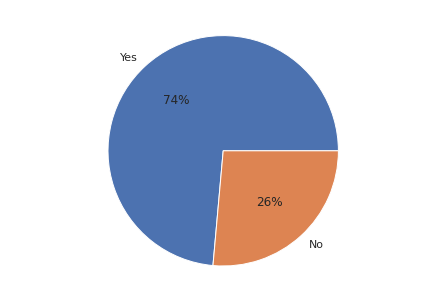

In [10]:
#Your codes here
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

### Exploratory Data Analysis (EDA) Variabel Numerik

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data `df_load` untuk di olah di tahap ini dan gunakan fungsi `subplots()` untuk membuat gambar dan satu set subplot.

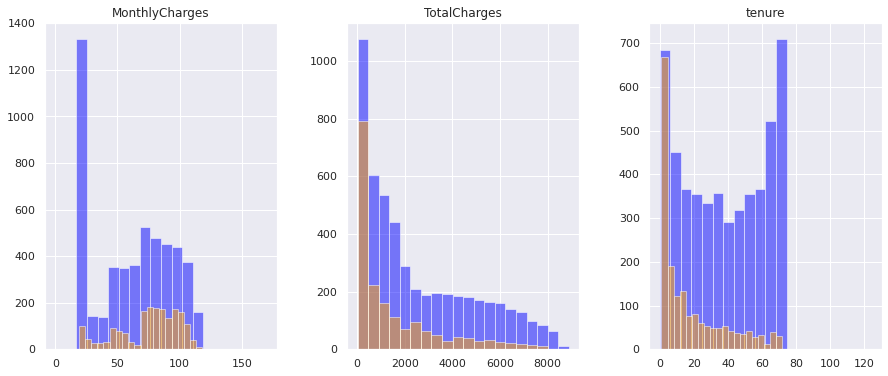

In [11]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

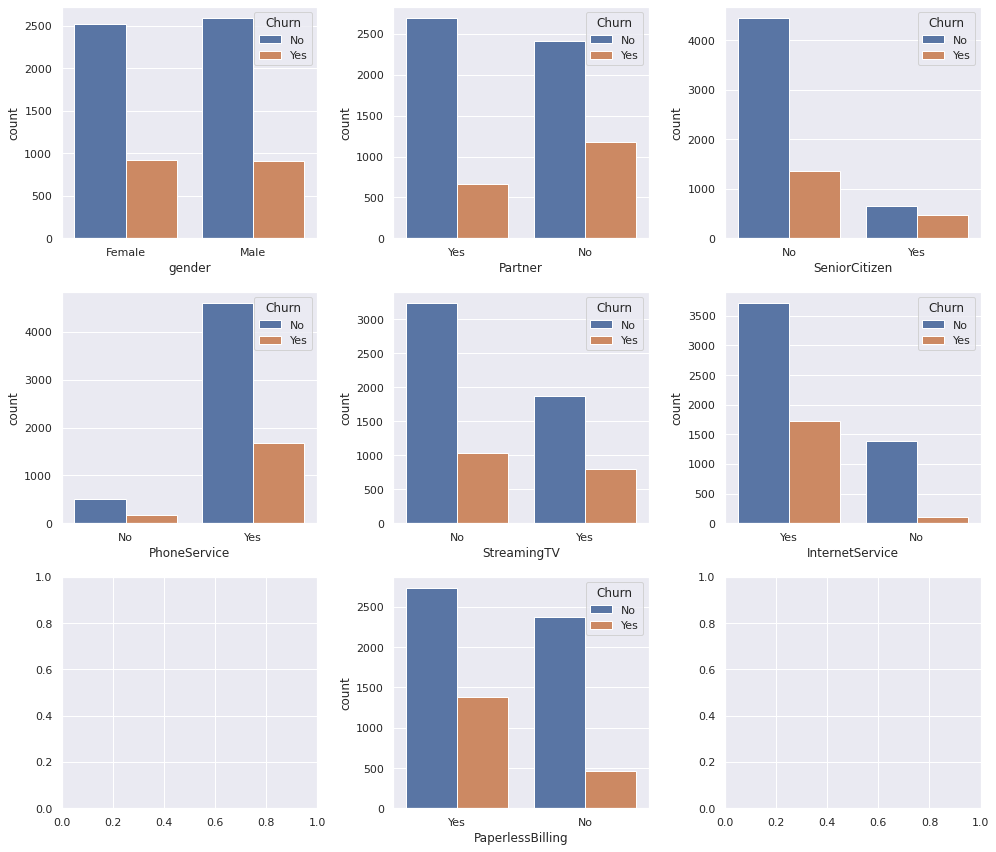

In [12]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

### Kesimpulan

Berdasarkan hasil dan analisa di atas dapat disimpulkan:

    pada tahap C.1 dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil Churn sebanyak 26% dan No Churn sebanyak 74%.
    pada tahap C.2 dapat kita ketahui bahwa untuk MonthlyCharges ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan Churn. Untuk TotalCharges terlihat tidak ada kecenderungan apapun terhadap Churn customers. Untuk tenure ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan Churn.
    pada tahap C.3 dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan churn dilihat dari faktor jenis kelamin (gender) dan layanan telfonnya (PhoneService). Akan tetapi ada kecenderungan bahwa orang yang melakukan churn adalah orang-orang yang tidak memiliki partner (partner: No), orang-orang yang statusnya adalah senior citizen(SeniorCitizen: Yes), orang-orang yang mempunyai layanan streaming TV (StreamingTV: Yes), orang-orang yang mempunyai layanan Internet (internetService: Yes) dan orang-orang yang tagihannya paperless (PaperlessBilling: Yes).
